**Import necessary libraries**


Image data generator is used to duplicate the images with some variations to increase the size of traiing set.
From keras API , dense, convolution , flatten , dropout and maxpooling libs are imported .
Numpy for nummerical analysis
Matplotlib for data visualization



This model can classify the Xray images of healthy humans and thse who has affetced with COVID 19 Pneumonia.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

**Introduction to the data set**

Parent directory -Data

Train and Test Directories contain covid19 and normal subdirectories that have the lungs  XRay images of  of Covid 19 Pneumonia  patients and normal contains lungs Xray images of healthy persons.


Training set is set of data that is used to train the model. During each epoch , the model will trained over and over on the same training data set and it will continue to learn about the features of data . Later we can deploy the trained model so that it can predict on a new set of data that it have not seen. The prediction will be based on what it learned during training process with trained set.

Validation set is different from the training set that is used to validate the data during training . With each epoch durining training it will be simultaneously validating the data from valid set. Here
80 %  of trainig set assigned to valid set . The main need of valid set is to ensure that our model is not overfitting to data in training set.

Test data set  is used to test the model after it has been trained. The test data should not be labelled.

Clone the  dataset from git account : -All files are uploaded to git

In [4]:
! git clone https://github.com/Deepslalitha/Datasets-CNN.git

Cloning into 'Datasets-CNN'...
remote: Enumerating objects: 2301, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 2301 (delta 0), reused 3 (delta 0), pack-reused 2298
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.67 MiB/s, done.
Updating files: 100% (2296/2296), done.


In [11]:
import os
main_dir = '/content/Datasets-CNN/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')
print(train_dir,train_covid_dir)


/content/Datasets-CNN/Data/train /content/Datasets-CNN/Data/train/COVID19


Printing the names



In [12]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(75).jpg', 'COVID19(303).jpg', 'COVID19(42).jpg', 'COVID19(187).jpg', 'COVID19(524).jpg', 'COVID19(571).jpg', 'COVID19(71).jpg', 'COVID19(473).jpg', 'COVID19(305).jpg', 'COVID-19 (1).jpeg']
['NORMAL(1365).jpg', 'NORMAL(1495).jpg', 'NORMAL(269).jpg', 'NORMAL(799).jpg', 'NORMAL(604).jpg', 'NORMAL(114).jpg', 'NORMAL(239).jpg', 'NORMAL(65).jpg', 'NORMAL(1536).jpg', 'NORMAL(1548).jpg']
['COVID-19 (516).jpg', 'COVID19(411).jpg', 'COVID19(350).jpg', 'COVID19(425).jpg', 'COVID19(391).jpg', 'COVID19(289).jpg', 'COVID-19 (425).jpg', 'COVID-19 (371).jpg', 'COVID19(84).jpg', 'COVID19(455).jpg']
['NORMAL(1432).jpg', 'NORMAL(115).jpg', 'NORMAL(540).jpg', 'NORMAL(560).jpg', 'NORMAL(1441).jpg', 'NORMAL(1060).jpg', 'NORMAL(731).jpg', 'NORMAL(179).jpg', 'NORMAL(1563).jpg', 'NORMAL(237).jpg']


Printing the total number of images

In [13]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484



**Visualizing the Data**

 Plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)

['/content/Datasets-CNN/Data/train/COVID19/COVID19(75).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(303).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(42).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(187).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(524).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(571).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(71).jpg', '/content/Datasets-CNN/Data/train/COVID19/COVID19(473).jpg']
['/content/Datasets-CNN/Data/train/NORMAL/NORMAL(1365).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(1495).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(269).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(799).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(604).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(114).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(239).jpg', '/content/Datasets-CNN/Data/train/NORMAL/NORMAL(65).jpg']


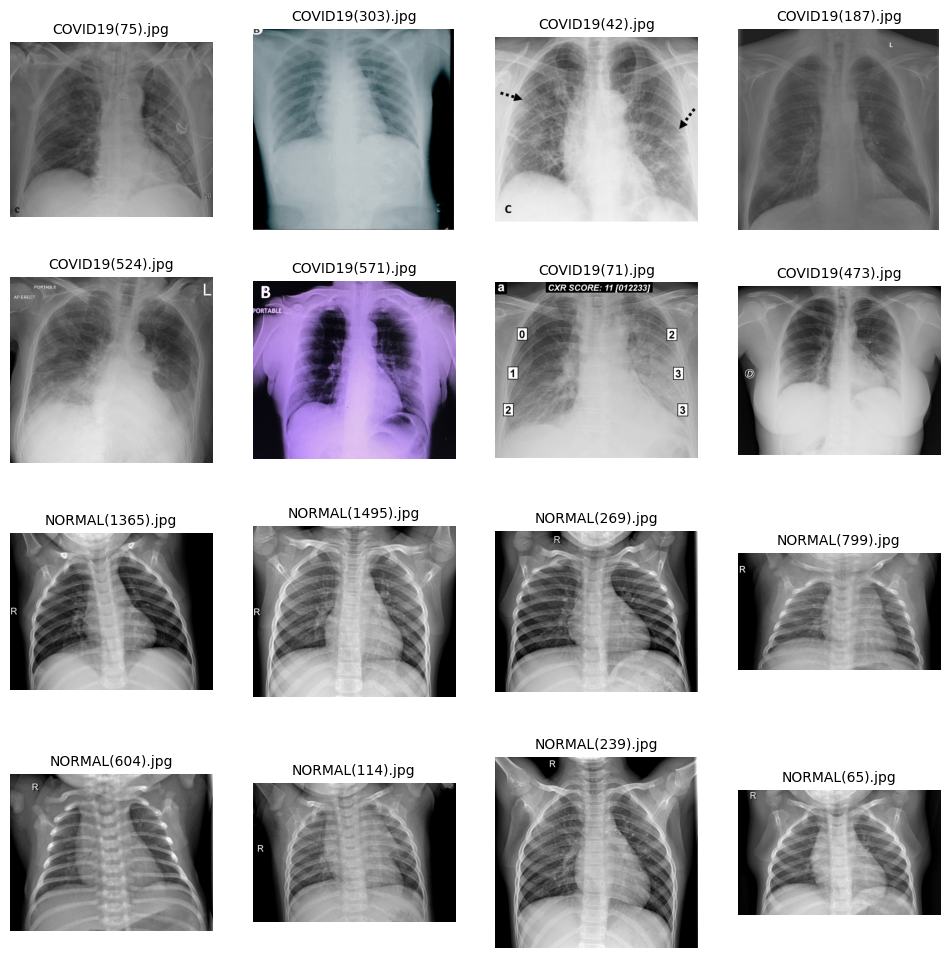

In [16]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

**Data Augmentation:**

We are creating new data based on modifications of existing data. We are creating new data by modifications on training  data set . We want to add more data to the training set. If we have smaller number of samples, we can create more samples by augmentation. For avoiding overfitting we can use augemntation. Overfitting occurs when our model is good to classify the data that it was trained on but not so good at classifying data it was not trained on .

Normalizing the pixel values between 0 and 1 ->rescale

Splitting the trainig data to validation set (20%)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


The class mode is binary .
Label for Covid category - 0
Label for normal category -1

In [18]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

Image shape

In [19]:
train_generator.image_shape

(150, 150, 3)

**CNN Model**

This model has two convolution layers, activation layer , max pooling layer, fullly connected layer .
The first convolution layer has 32 filters with size 5 * 5.* Input shape* is 150 * 150 * 3.
Padding is set as same so that we dont use information in image. The pool size is  2 * 2 that  actually reduce the size to half maintaing the features that image has
RELU (non-linearity)activation funcation is applied .
RELU- > Any value that is  less than 0 is set as 0 and any positive value is set as it is . Activation is included to imporve the  sparsity of feature maps which improves performance of neural network.
After RELU , we are downsampling the dimension with max pooling .
After seond convolution the output is  flattened and passed to fully connected layer and lastly we use dense layer with sigmoid activation function.
Dropout layer is introduced to minimze overfitting . This is set as 50%.

The second convolution layer has 64 filters with size  5 * 5 .
Padding is set as same.
Flattening is done so that 2D image is converted to 1D array.
Dense layer has 256 neurons and 50% neurons are dropped out.
Sigmoid activation function is added since it is a binary classification problem.




In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# New Section

**Compile & Train Model**

In [23]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate = 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#train the model
history = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
46/46 [==============================] - 166s 4s/step - loss: 0.7791 - accuracy: 0.7881 - val_loss: 0.5137 - val_accuracy: 0.8313
Epoch 2/20
46/46 [==============================] - 171s 4s/step - loss: 0.2523 - accuracy: 0.8992 - val_loss: 0.2914 - val_accuracy: 0.9062
Epoch 3/20
46/46 [==============================] - 189s 4s/step - loss: 0.1903 - accuracy: 0.9289 - val_loss: 0.1448 - val_accuracy: 0.9531
Epoch 4/20
46/46 [==============================] - 168s 4s/step - loss: 0.1587 - accuracy: 0.9476 - val_loss: 0.1089 - val_accuracy: 0.9594
Epoch 5/20
46/46 [==============================] - 165s 4s/step - loss: 0.1482 - accuracy: 0.9531 - val_loss: 0.0991 - val_accuracy: 0.9594
Epoch 6/20
46/46 [==============================] - 180s 4s/step - loss: 0.1106 - accuracy: 0.9607 - val_loss: 0.1119 - val_accuracy: 0.9719
Epoch 7/20
46/46 [==============================] - 184s 4s/step - loss: 0.1148 - accuracy: 0.9627 - val_loss: 0.0987 - val_accuracy: 0.9656
Epoch 8/20
46

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Traning and Validation loss**

Loss has went down with every epoch .
The data is fitted well

Text(0.5, 0, 'epoch')

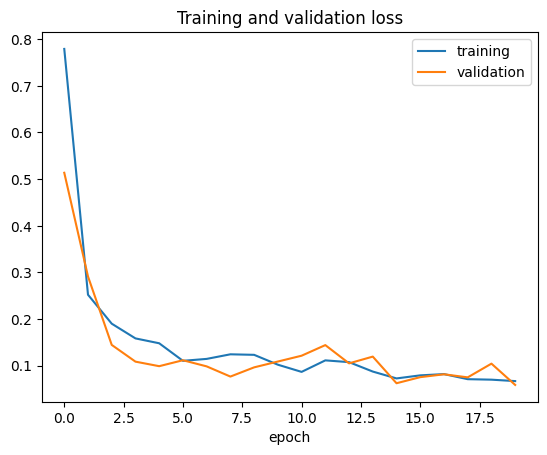

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

**Training and validation accuracy**

Traning accuracy around 97%
Validation accuracy around 98%

Over the number of epcohs bith have increased.

Text(0.5, 0, 'epoch')

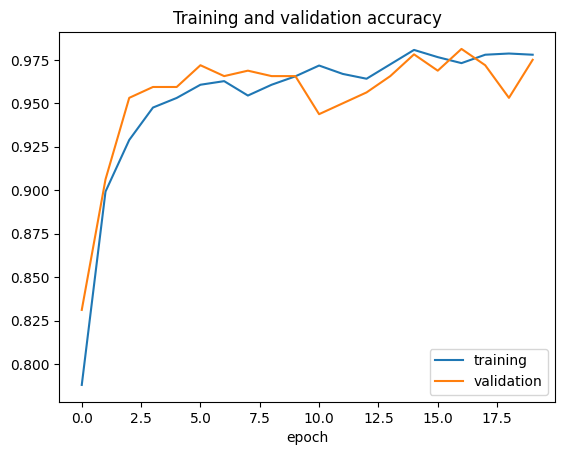

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

**Evaluate the model on test data**

Model is evaluated against test data . Test acccuracy is around 97% and test loss around .089

In [28]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 24s 1s/step - loss: 0.0898 - accuracy: 0.9669
test acc :0.9669421315193176 test loss:0.08976907283067703


Test  model with some images from  local computer to predict whether a patient is affected by COVID19 or not.
Class 0 -Covid19
Class 1 - Normal

In [35]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving COVID-19 (313).jpg to COVID-19 (313).jpg
Saving NORMAL(0).jpg to NORMAL(0).jpg
/content/COVID-19 (313).jpg
1/1 [==============================] - 1s 802ms/step
COVID-19 (313).jpg
Covid19
/content/NORMAL(0).jpg
1/1 [==============================] - 1s 859ms/step
NORMAL(0).jpg
Normal


In [33]:
model.save('CNNXrayModel.keras')